In [1]:
"""
Template for week 6 project in Data Visualization

Create a word cloud from a list words with frequency counts
"""

import math
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import dill as pickle

In [2]:
# Resource paths
PLOTS_PATH = "plots/"
DATA_PATH = "data/"


In [3]:
############################################################################
# Provided code 

PLOT_RANGE = [-1, 1]
FIG_SIZE = 8

with open(DATA_PATH + "project6_boxes.pickle", 'rb') as file:
    BOXES = pickle.load(file)

In [5]:
def init_plot(title):
    """
    Input: string title
    
    Ouput/action: Initialize plot in matplotlib and
    return figure/axis tuple
    """
    
    fig = plt.figure()
    fig.set_figheight(FIG_SIZE)
    fig.set_figwidth(FIG_SIZE)
    
    axs = plt.subplot()
    axs.set_xlim(PLOT_RANGE)
    axs.set_ylim(PLOT_RANGE)
    
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_title(title)
    
    return fig, axs

In [6]:
def random_box_pos(box_size):
    """
    Input: Tuple box_size of floats
    
    Output: Tuple of floats corresponding to random lowerleft position
    of rectangle that lies in specified PLOT_RANGE
    """
    box_pos = (random.uniform(PLOT_RANGE[0], PLOT_RANGE[1] - box_size[0]),
               random.uniform(PLOT_RANGE[0], PLOT_RANGE[1] - box_size[1]))
    return box_pos

In [7]:
############################################################################
# Part 1 - Compute random arrangements and plot the word cloud


def random_arrangement(word_boxes, seed=None):
    
    """
    Input: OrderedDict word_boxes with items (word, (font_size, box_size, word_off)),
    optional integer seed
    
    Output: OrderedDict with items (word, (font_size, box_pos, box_size, word_off))
    where box_pos is computed using random_box_pos()
    """
    random.seed(seed)
    arranged = collections.OrderedDict()
    for word, (font_size, box_size, word_off) in word_boxes.items():
        box_pos = random_box_pos(box_size)
        arranged[word] = (font_size, box_pos, box_size, word_off)
    return arranged

In [12]:
def plot_wordcloud(word_arrangement, title="Word cloud"):
    """
    Input: Dictionary word_arrangements with items (word, (font_size, box_pos, box_size, word_off)),
    optional string title
    
    Output: matplotlib figure containing plot of words using the specified font size and positions
    
    NOTE: The word's position is box_pos + word_off
    """
    
    fig, axs = init_plot(title)  
    
    for word, (font_size, box_pos, box_size, word_off) in word_arrangement.items():
        word_pos = (box_pos[0] + word_off[0], box_pos[1] + word_off[1])
        axs.text(word_pos[0], word_pos[1], word,
             fontsize=font_size, bbox=dict(facecolor='yellow', edgecolor='red', pad=0.0))
    return fig

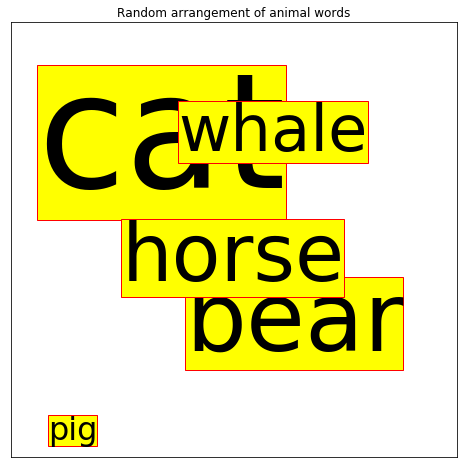

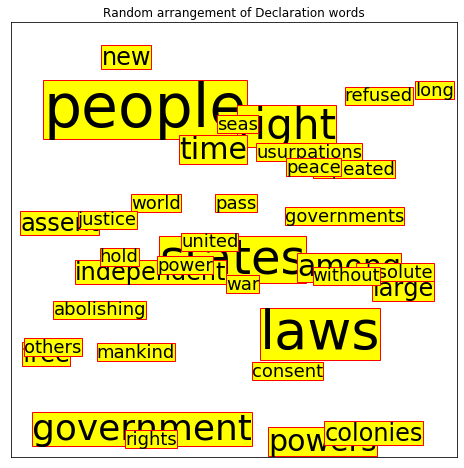

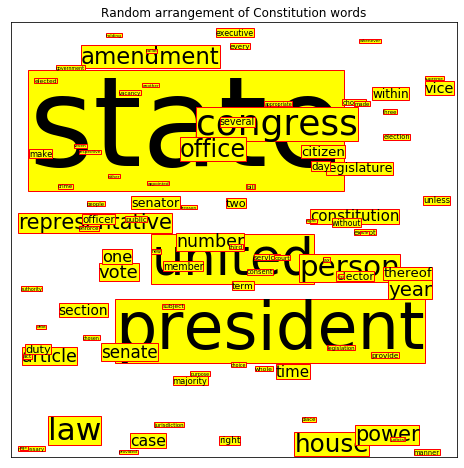

In [13]:
def test_random_arrangement():
    """ Test random_arrangement() """
        
    animal_arrangement = random_arrangement(BOXES["animals"], seed=1)
    plot_wordcloud(animal_arrangement, "Random arrangement of animal words")
    
    declaration_arrangement = random_arrangement(BOXES["declaration"], seed=1)
    plot_wordcloud(declaration_arrangement, "Random arrangement of Declaration words")
    
    constitution_arrangement = random_arrangement(BOXES["constitution"], seed=1)
    plot_wordcloud(constitution_arrangement, "Random arrangement of Constitution words")
    
    
test_random_arrangement()

In [ ]:
#######################################################################
# Part 2 - Compute Monte Carlo arrangement


def intersect_intervals(interval1, interval2):
    """
    Input: Two pairs of numbers interval1 and interval2 as tuples
    
    Output: Boolean that indicates whether intervals overlap
    
    NOTE: Sharing a common endpoint is treated as NOT overlapping
    """
    
    return False

In [ ]:
def intersect_boxes(box1, box2):
    """
    Input: Boxes box1, box2 of the form (box_pos, box_size)
    
    Output: Boolean indicating whether box1 and box2 intersect
    """
    
    return False

In [ ]:
def intersect_box_arrangement(test_box, word_arrangement):
    """
    Input: Box test_box specified as tuple of position and size,
    OrderedDict word_arrangement with items (word, (font_size, box_pos, box_size, word_off))
    
    Output: Boolean indicating whether test_box intersects
    ANY of the boxes in word_arrangement
    """
    
    return False

In [ ]:
# Going to need better small tests here
def test_intersection_stuff():
    """ Test intersection code """
    
    # Test intersect_intervals()
    print("Testing intersect_interval()")
    print(intersect_intervals((0, 1), (0, 1)))
    print(intersect_intervals((0, 2), (1, 3)))
    print(intersect_intervals((0, 2), (-1, 3)))
    print(intersect_intervals((0, 2), (3, 5)))
    print(intersect_intervals((3, 5), (-2, 0)))
    print(intersect_intervals((0, 1), (1, 2)))
    
    # Test intersect_boxes()
    print("Testing intersect_boxes()")
    print(intersect_boxes(((0, 2), (2, 2)), ((1, 3), (2, 2))))
    print(intersect_boxes(((0, 2), (2, 1)), ((1, 3), (2, 1.6))))
    print(intersect_boxes(((0, 2), (2, 1)), ((1, 3), (2, 0.6))))
    print(intersect_boxes(((0, 2), (2, 2)), ((1, 3), (2, 2))))
    print(intersect_boxes(((0, 2), (2, 2)), ((1, 3), (0, 2))))
    print(intersect_boxes(((0, 0), (2, 2)), ((2, 0), (1, 1))))
    
    # Test intersect_box_arrangement()
    print("Testing intersect_box_arrangement()")
    print(intersect_box_arrangement(((0, 0), (1, 1)), dict()))
    print(intersect_box_arrangement(((0, 2), (2, 2)), dict((("a", (0, (1, 3), (2, 2), (0, 0))),
                                                            ("b", (0, (1, 3), (2, 2), (0, 0))),
                                                            ("c", (0, (1, 3), (0, 2), (0, 0)))))))
    print(intersect_box_arrangement(((0, 2), (2, 1)), dict((("a", (0, (1, 3), (2, 1.6), (0, 0))),
                                                            ("b", (0, (1, 3), (2, 0.6), (0, 0)))))))

test_intersection_stuff()

Correct output
~~~~
Testing intersect_interval()
True
True
True
False
False
False
Testing intersect_boxes()
True
False
False
True
True
False
Testing intersect_box_arrangement()
False
True
False
~~~~

In [ ]:
def montecarlo_arrangement(word_boxes, max_tries=100, seed=None):
    """
    Input: OrderedDict word_boxes with items (word, (font_size, box_size, word_off)) 
    integer max_tries, optional integer seed
    
    Output: OrderedDict with items (word, (font_size, box_pos, box_size, word_off))
    
    NOTE: Returned dictionary is computed one word at time
    using at most max_tries calls to random_box_pos() for each box.
    If no non-intersecting position is found vs. current arrangement,
    box is added to current arrangement using last position
    """
    
    return collections.OrderedDict()

In [ ]:
def test_montecarlo_arrangement():
    """ Test test_montecarlo_arrangement """
        
    animal_arrangement = montecarlo_arrangement(BOXES["animals"], seed=2)
    plot_wordcloud(animal_arrangement, "Monte Carlo arrangement of animal words")
    
    declaration_arrangement = montecarlo_arrangement(BOXES["declaration"], seed=1)
    plot_wordcloud(declaration_arrangement, "Monte Carlo arrangement of Declaration words")
    
    constitution_arrangement = montecarlo_arrangement(BOXES["constitution"], seed=1)
    plot_wordcloud(constitution_arrangement, "Monte Carlo arrangement of Constitution words")
    
  
    
test_montecarlo_arrangement()

In [ ]:
###################################################################
# Provided code for part 3 - Compute spiral arrangement

TURNS = 8
STEPS = np.linspace(-2 * math.pi * TURNS, 0, 129)

In [ ]:
def spiral_pos(theta, yoff):
    """
    Input: Floats theta, yoff
    
    Output: Parametric coordinates of point on logarthmic spiral
    translated vertically by yoff
    """
    
    rad = math.exp(theta / (2 * TURNS))
    return [rad * math.cos(theta), rad * math.sin(theta) + yoff]

In [ ]:
def initial_yoff():
    """
    Output: Float corresponding to random vertical offset of initial box 
    in spiral arrangement
    """

    yoff = 0.25 * random.uniform(PLOT_RANGE[0], PLOT_RANGE[1])
    return yoff

In [ ]:
def plot_spiral():
    """
    Action: plot logarithmic spiral use to create a spiral arrangement
    """
    
    title = "Parametric plot of spiral"
    fig, axs = init_plot(title)
                        
    points = [spiral_pos(theta, 0) for theta in STEPS]
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]
    axs.plot(x_coords, y_coords)
    return fig
    
#plot_spiral()

In [ ]:
############################################################
# Student code for part 3 

def spiral_arrangement(word_boxes, seed=None):
    """
    Input: OrderedDict with items (word, (font_size, box_size, word_off)) 
    optional integer seed
    
    Output: OrderedDict with items (word, (font_size, box_pos, box_size, word_off))
    
    NOTE: Returned dictionary is computed one word at time (in order)
    using non-intersecting boxes whose centers are positioned along the spiral.
    If no non-intersecting position is found vs. current arrangement,
    box is added to current arrangement using last position on the spiral
    """

    return collections.OrderedDict()

In [ ]:
def test_spiral_arrangement():
    """ Test spiral_arrangement() """
        
    animal_arrangement = spiral_arrangement(BOXES["animals"], seed=6)
    plot_wordcloud(animal_arrangement, "Spiral arrangement of animal words")
    
    declaration_arrangement = spiral_arrangement(BOXES["declaration"], seed=1)
    plot_wordcloud(declaration_arrangement, "Spiral arrangement of Declaration words")
    
    constitution_arrangement = spiral_arrangement(BOXES["constitution"], seed=2)
    plot_wordcloud(constitution_arrangement, "Spiral arrangement of Constitution words")
    
    
test_spiral_arrangement()